
# Getting started


"The Iowa State legislature is considering changes in the liquor tax rates and wants a report of current liquor sales by county and projections for the rest of the year."
Calculate the yearly liquor sales for each score using the provided data. You can add up the transactions for each year, and store sales in 2015 specifically will be used later as your target variable.

Use the data from 2015 to make a linear model using as many variables as you find useful to predict the yearly sales of each store. You must use the sales from Jan to March per store as one of your variables.

Use your model for 2015 to estimate total sales for each store in 2016, extrapolating from the sales so far for Jan-March of 2016.

Report your findings, including any projected increase or decrease in total sales (over the entire state) for the tax committee of the Iowa legislature.

Use cross-validation to check how your model predicts to held out data compared to the model metrics on the full dataset.

Fit your model(s) using one or both of the regularization tactics covered. Explain whether the regularized or the non-regularized model performed better and what the selected regression(s) are doing.


## Problem Statement
The Iowa State Legislature is considering whether to change liquor tax rates and wants a detailed report of liquor sales by county and projections for the future. There are 99 counties in total, and the transactions take place from  January 1, 2015 to March 31, 2016 (452 days in total). The legislature requires a report of alcohol sales taking place during 2015, and wants predictions of how sales will fare for the rest of 2016, and insight on the most significant factors in determing sales.

My task will be to sum up the sales in 2015, showcase where most counties' sale numbers lie, and to indicate how sales are projected to fare in 2016 and beyond. For this task, I will be using Pandas DataFrames to analyze the sales dataset and scikit modeling to determine what factors, including counties, are most significant in determining sales. More specifically, I will be focusing on the sales throughout the first three months of 2015, creating a model to project sales in 2016, and will compare the results of that model to what I actually observe in the first three months of 2016 to see if it is an acceptable model.

In [1]:
# score rubric: https://github.com/ga-students/DC-DSI-3/blob/master/projects/02-project/project-02-rubric.md

In [2]:
import pandas as pd

## Load the data into a DataFrame
iowadf = pd.read_csv('Iowa_Liquor_sales_sample_10pct (1).csv')

## Transform the dates if needed, e.g.
#df["bDate"] = pd.to_datetime(df["Date"], format="%m-%d-%y") 
iowadf.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/4/15,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,3/2/16,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2/11/16,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,2/3/16,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,8/18/15,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [3]:
#Change column names and parse out date values. 

In [4]:
iowadf = iowadf.rename(columns={'Store Number':'store_number', 'County Number':'county_number', 'Category':'category', 'Vendor Number':'vendor_number', 'Item Number':'item_number', 'Bottle Volume (ml)':'bottle_vol_ml', 'Bottles Sold':'bottles_sold', 'Volume Sold (Liters)':'vol_sold_l', 'Volume Sold (Gallons)': 'vol_sold_g'})

In [5]:
#Still have some columns to rename.

In [6]:
iowadf = iowadf.rename(columns={'Date':'date','City':'city','Zip Code':'zip_code', 'County':'county', 'Category Name':'category_name', 'Item Description':'item_description', 'State Bottle Cost':'state_bottle_cost','State Bottle Retail':'state_bottle_retail','Sale (Dollars)':'sale_dollars'})

In [7]:
iowadf.head()

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,vol_sold_l,vol_sold_g
0,11/4/15,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,3/2/16,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2/11/16,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,2/3/16,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,8/18/15,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [8]:
iowadf.store_number.value_counts()

2633    2485
4829    2300
2512    1758
2572    1652
2190    1626
2515    1565
2501    1553
2500    1521
2670    1506
2587    1481
2648    1445
2620    1438
2603    1407
2590    1356
2629    1335
2666    1319
2614    1306
2565    1303
2647    1297
2616    1288
2619    1261
2561    1250
4129    1247
2623    1235
2552    1201
2625    1183
3773    1176
2506    1174
4167    1142
3952    1140
        ... 
5033       5
4121       5
5139       5
4990       5
5229       5
5189       5
5233       4
4335       4
5232       4
4954       4
4855       4
5208       4
4737       4
5234       3
5193       3
5195       3
5201       3
5216       3
4834       3
5223       3
4939       3
5192       2
5130       2
5218       2
4776       2
4567       2
4778       2
5053       1
9023       1
9018       1
Name: store_number, dtype: int64

In [9]:
#Important variables to consider: city, county,
# category name, state bottle cost and retail, bottles sold, 
# sale dollars, and volumes sold in liters. 

In [10]:
iowadf.dtypes

date                    object
store_number             int64
city                    object
zip_code                object
county_number          float64
county                  object
category               float64
category_name           object
vendor_number            int64
item_number              int64
item_description        object
bottle_vol_ml            int64
state_bottle_cost       object
state_bottle_retail     object
bottles_sold             int64
sale_dollars            object
vol_sold_l             float64
vol_sold_g             float64
dtype: object

In [11]:
iowadf['sale_dollars'] = (iowadf['sale_dollars'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))

In [12]:
iowadf['state_bottle_cost'] = (iowadf['state_bottle_cost'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))

In [13]:
iowadf['state_bottle_retail'] = (iowadf['state_bottle_retail'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))

In [14]:
iowadf.head()

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,vol_sold_l,vol_sold_g
0,11/4/15,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,3/2/16,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2/11/16,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2/3/16,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,8/18/15,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [15]:
iowadf.isnull().sum()

date                      0
store_number              0
city                      0
zip_code                  0
county_number          1077
county                 1077
category                 68
category_name           632
vendor_number             0
item_number               0
item_description          0
bottle_vol_ml             0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
vol_sold_l                0
vol_sold_g                0
dtype: int64

In [16]:
#iowadf['county'].fillna(iowadf['city'], inplace='True')

In [17]:
iowadf.dtypes

date                    object
store_number             int64
city                    object
zip_code                object
county_number          float64
county                  object
category               float64
category_name           object
vendor_number            int64
item_number              int64
item_description        object
bottle_vol_ml            int64
state_bottle_cost      float64
state_bottle_retail    float64
bottles_sold             int64
sale_dollars           float64
vol_sold_l             float64
vol_sold_g             float64
dtype: object

In [18]:
#Parse the dates. Just use to_datetime. There's a way to specifiy HOW it's converting to date_time. 

In [19]:
'%m/%d/%y'

'%m/%d/%y'

In [20]:
iowadf['date'] = pd.to_datetime(iowadf['date'], format='%m/%d/%y')

In [21]:
iowadf['year'] = iowadf['date'].dt.year

In [22]:
iowadf['month'] = iowadf['date'].dt.month

In [23]:
iowadf.head()

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,vol_sold_l,vol_sold_g,year,month
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,2015,11
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,2016,3
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,2016,2
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,2016,2
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,2015,8


In [24]:
#Check for null values.

In [25]:
pd.isnull(iowadf).sum()

date                      0
store_number              0
city                      0
zip_code                  0
county_number          1077
county                 1077
category                 68
category_name           632
vendor_number             0
item_number               0
item_description          0
bottle_vol_ml             0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
vol_sold_l                0
vol_sold_g                0
year                      0
month                     0
dtype: int64

We have 1077 missing values for both county and county number, and 632 missing for category name. The latter number of null values shouldn't affect our data mining, but the others could present a problem. I'll need to fill them with something else. 

In [26]:
iowadf['county'].fillna(iowadf['city'], inplace='True')

There are 99 counties in total. The ones with the most transactions include Polk (49102), Linn(23511), Scott(16678), 
Black Hawk (15083), and Johnson (13189). 

In [27]:
store_comparison = pd.get_dummies(iowadf['store_number'])

There are 1400 different stores in total. 

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

AND 

# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.


In [28]:
# There are functions within Pandas by which I can find the trends in sales for all counties. 
# I need to find the TOTAL sales in each county in each year. Focus on bottles_sold, sale_dollars, vol_sold_l, county,
# and date.

In [29]:
#There are 452 days in total, from January 1, 2015 to March 31, 2016. 

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
#Maybe I should make a separate dfs for 2015 and 2016. 

In [32]:
y1_iowadf = iowadf[iowadf.year == 2015]

In [33]:
y1_iowadf.head()

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,vol_sold_l,vol_sold_g,year,month
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38,2015,11
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55,2015,8
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77,2015,4
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59,2015,8
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92,2015,6


In [34]:
y1_iowadf.sale_dollars.sum()

28527245.39000142

In [35]:
y1_iowadf.sale_dollars.mean()

130.50333215916913

In [36]:
y1_iowadf = y1_iowadf.drop(y1_iowadf.columns[[1,2,3,6,7,8,9,18]], axis=1)

In [37]:
y1_iowadf

,date,county_number,county,item_description,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,vol_sold_l,vol_sold_g,month
0,2015-11-04,9.0,Bremer,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38,11
4,2015-08-18,99.0,Wright,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55,8
5,2015-04-20,57.0,Linn,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77,4
6,2015-08-05,90.0,Wapello,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59,8
7,2015-06-25,17.0,Cerro Gordo,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92,6
9,2015-11-10,6.0,Benton,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53,11
10,2015-09-28,77.0,Polk,Knob Creek Single Barrel Reserve,750,26.24,39.36,6,236.16,4.50,1.19,9
11,2015-10-28,62.0,Mahaska,Chi-Chi's Margarita W/tequila,1750,6.00,9.25,6,55.50,10.50,2.77,10
12,2015-01-22,82.0,Scott,Windsor Canadian Pet,1750,8.92,13.38,1,13.38,1.75,0.46,1
15,2015-06-10,9.0,Bremer,Mr. Boston Apricot Brandy,750,4.50,6.75,4,27.00,3.00,0.79,6


In [38]:
#Nate's method to group by county sume and reindexing for each county overall: 
y1_county_agg = y1_iowadf.groupby(['county']).sum()

In [39]:
y1_county_agg

,county_number,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,vol_sold_l,vol_sold_g,month
county,,,,,,,,,
Adair,472.0,476750,4281.27,6430.18,3780,43747.18,3510.22,927.11,3212
Adams,378.0,190650,1924.44,2888.31,754,10245.14,822.28,216.98,1309
Allamakee,2496.0,874325,8261.37,12405.30,6020,79918.47,6290.75,1661.77,5914
Appanoose,3412.0,813650,8064.97,12112.67,6419,77033.64,6318.42,1669.39,5702
Audubon,955.0,191075,1636.77,2459.67,1429,16429.26,1448.68,382.82,1205
BELMOND,NaN,137250,1218.76,1830.45,669,9207.02,809.50,213.76,709
Benton,4764.0,819500,7442.15,11176.01,5269,65334.19,5532.61,1461.59,5240
Black Hawk,84826.0,10373325,112759.05,169344.28,142934,1583084.01,108736.43,28730.01,81744
Boone,13544.0,1622100,15583.71,23408.94,14244,185610.02,14603.75,3858.04,11267


In [40]:
y1_county_agg = y1_county_agg.reset_index()

In [41]:
y1_county_agg.head()

,county,county_number,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,vol_sold_l,vol_sold_g,month
0,Adair,472.0,476750,4281.27,6430.18,3780,43747.18,3510.22,927.11,3212
1,Adams,378.0,190650,1924.44,2888.31,754,10245.14,822.28,216.98,1309
2,Allamakee,2496.0,874325,8261.37,12405.30,6020,79918.47,6290.75,1661.77,5914
3,Appanoose,3412.0,813650,8064.97,12112.67,6419,77033.64,6318.42,1669.39,5702
4,Audubon,955.0,191075,1636.77,2459.67,1429,16429.26,1448.68,382.82,1205


In [42]:
y1_county_agg.bottles_sold.mean()

21751.1

The average number of bottles sold in 2015 per county was 21,964 bottles. 

In [43]:
#Find a way to make a df for Jan-March 2015
y1_jan_iowadf = y1_iowadf[y1_iowadf.month == 1]

In [44]:
y1_feb_iowadf = y1_iowadf[y1_iowadf.month == 2] 

In [45]:
y1_march_iowadf = y1_iowadf[y1_iowadf.month == 3] 

In [46]:
frames = [y1_jan_iowadf, y1_feb_iowadf, y1_march_iowadf]

In [47]:
y1_p1_iowadf = pd.concat(frames)

In [48]:
y1_p1_iowadf.tail()

,date,county_number,county,item_description,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,vol_sold_l,vol_sold_g,month
270893,2015-03-18,85.0,Story,Paramount Amaretto,750,3.38,5.07,12,60.84,9.0,2.38,3
270903,2015-03-18,82.0,Scott,Smirnoff Sorbet Light Lemon,750,8.25,12.38,2,24.76,1.5,0.40,3
270907,2015-03-16,56.0,Lee,Crown Royal Regal Apple,750,15.00,22.50,24,540.00,18.0,4.76,3
270934,2015-03-18,97.0,Woodbury,Mr. Boston Blackberry Brandy,1750,10.00,15.00,2,30.00,3.5,0.92,3
270936,2015-03-31,57.0,Linn,Jose Cuervo Especial Reposado Tequila,750,10.49,15.74,12,188.88,9.0,2.38,3


In [49]:
y1_p1_iowadf.sale_dollars.sum()

6153795.88999969

The total sales in dollars in Jan-March 2015 was approximately $6,153,795.89.

In [50]:
y1_p1_county_agg = y1_p1_iowadf.groupby(['county']).sum()

In [51]:
y1_p1_county_agg.head()

,county_number,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,vol_sold_l,vol_sold_g,month
county,,,,,,,,,
Adair,111.0,102575,966.13,1450.08,1075,10222.00,814.54,215.16,224
Adams,86.0,42475,429.46,644.25,174,2253.60,183.27,48.35,96
Allamakee,411.0,153450,1336.12,2007.74,1135,14907.98,1244.68,328.77,257
Appanoose,724.0,172125,1566.11,2352.68,1317,15228.09,1207.15,319.02,360
Audubon,305.0,62125,529.36,795.86,435,5510.75,557.50,147.35,129


In [52]:
y1_p1_county_agg=y1_p1_county_agg.reset_index()

In [53]:
y1_p1_county_agg.head()

,county,county_number,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,vol_sold_l,vol_sold_g,month
0,Adair,111.0,102575,966.13,1450.08,1075,10222.00,814.54,215.16,224
1,Adams,86.0,42475,429.46,644.25,174,2253.60,183.27,48.35,96
2,Allamakee,411.0,153450,1336.12,2007.74,1135,14907.98,1244.68,328.77,257
3,Appanoose,724.0,172125,1566.11,2352.68,1317,15228.09,1207.15,319.02,360
4,Audubon,305.0,62125,529.36,795.86,435,5510.75,557.50,147.35,129


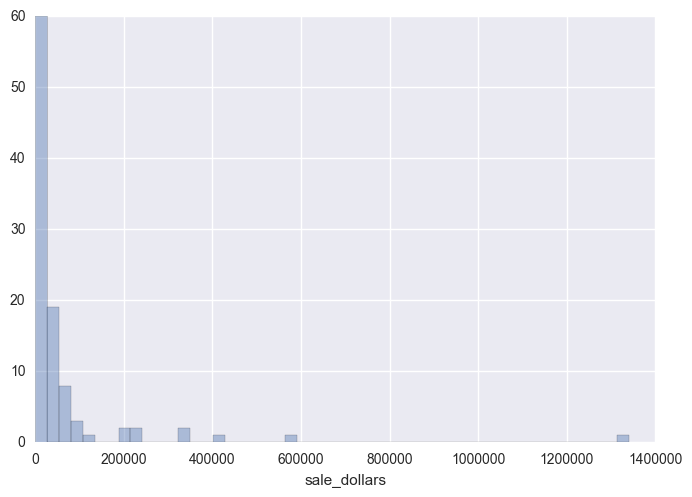

In [54]:
sales_dist_for_2015_p1 = sns.distplot(y1_p1_county_agg['sale_dollars'], kde=False)
plt.show()

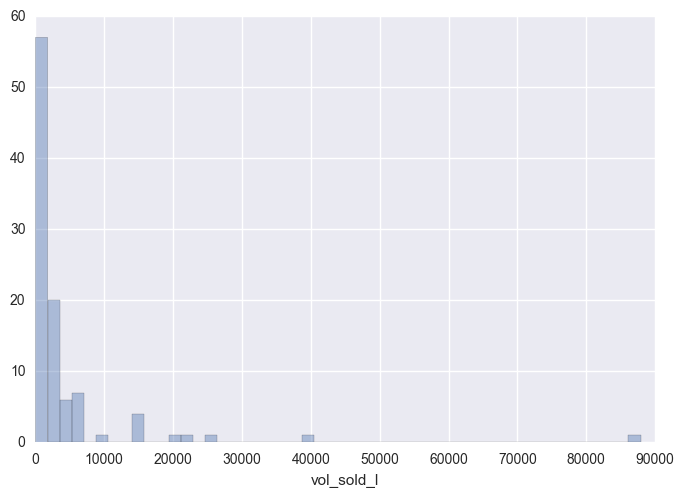

In [55]:
vol_sold_dist_for_2015_p1 = sns.distplot(y1_p1_county_agg['vol_sold_l'], kde=False)
plt.show()

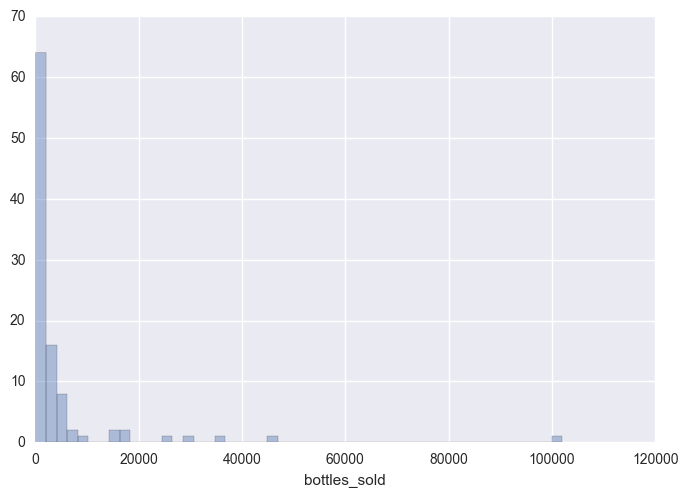

In [56]:
vol_sold_dist_for_2015_p1 = sns.distplot(y1_p1_county_agg['bottles_sold'], kde=False)
plt.show()

In [57]:
y2_iowadf = iowadf[iowadf.year == 2016]

In [58]:
y2_iowadf.head()

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,vol_sold_l,vol_sold_g,year,month
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,2016,3
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,2016,2
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,2016,2
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.0,0.79,2016,1
13,2016-02-29,4673,WEST POINT,52656,56.0,Lee,1081300.0,PEPPERMINT SCHNAPPS,322,75211,Kinky Liqueur,750,10.00,15.00,12,180.00,9.0,2.38,2016,2


In [59]:
y2_iowadf = y2_iowadf.drop(y2_iowadf.columns[[1,2,3,6,7,8,9,18]], axis=1)

In [60]:
y2_iowadf.tail()

,date,county_number,county,item_description,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,vol_sold_l,vol_sold_g,month
270897,2016-01-28,23.0,Clinton,Jim Beam Kentucky Fire Mini,500,4.70,7.05,2,14.10,1.0,0.26,1
270899,2016-01-13,52.0,Johnson,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,12,225.00,12.0,3.17,1
270905,2016-02-18,77.0,Polk,Remy Martin Vsop Cognac,200,5.70,8.55,6,51.30,1.2,0.32,2
270929,2016-01-25,70.0,Muscatine,Phillips Vodka,750,3.57,5.36,4,21.44,3.0,0.79,1
270944,2016-03-22,77.0,Polk,Paramount Creme De Menthe/green,750,4.75,7.13,2,14.26,1.5,0.40,3


In [61]:
y2_county_agg = y2_iowadf.groupby(['county']).sum()

In [62]:
y2_county_agg.head()

,county_number,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,vol_sold_l,vol_sold_g,month
county,,,,,,,,,
ACKLEY,NaN,16250,181.12,272.10,93,1583.75,101.75,26.87,23
ALTOONA,NaN,7875,109.27,163.93,207,3788.34,186.75,49.34,26
ANAMOSA,NaN,52075,553.38,830.19,280,4257.62,311.13,82.19,147
ATLANTIC,NaN,2375,29.04,43.57,36,385.62,21.75,5.75,10
AUDUBON,NaN,1875,20.86,31.30,27,186.69,14.62,3.86,12


In [63]:
y2_county_agg = y2_county_agg.reset_index()

In [64]:
y2_county_agg.head()

,county,county_number,bottle_vol_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,vol_sold_l,vol_sold_g,month
0,ACKLEY,NaN,16250,181.12,272.10,93,1583.75,101.75,26.87,23
1,ALTOONA,NaN,7875,109.27,163.93,207,3788.34,186.75,49.34,26
2,ANAMOSA,NaN,52075,553.38,830.19,280,4257.62,311.13,82.19,147
3,ATLANTIC,NaN,2375,29.04,43.57,36,385.62,21.75,5.75,10
4,AUDUBON,NaN,1875,20.86,31.30,27,186.69,14.62,3.86,12


In [65]:
true_target = y2_county_agg.sale_dollars.sum()

In [66]:
true_target

6399497.56000001

In [67]:
y2_county_agg.bottles_sold.mean()

3700.474074074074

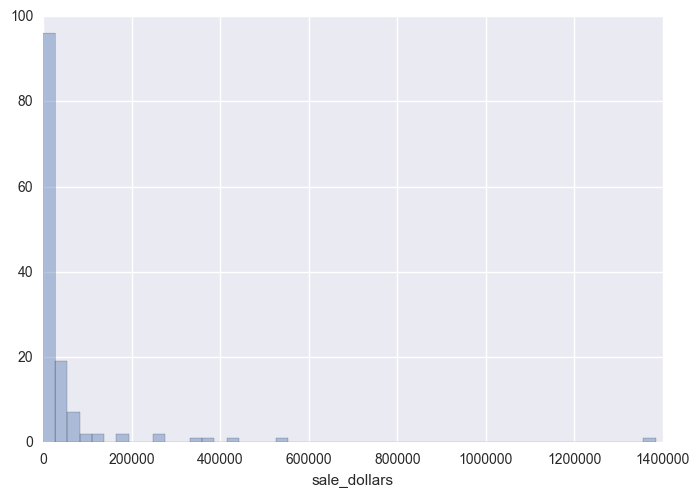

In [68]:
sales_dist_2 = sns.distplot(y2_county_agg['sale_dollars'], kde=False)
plt.show()

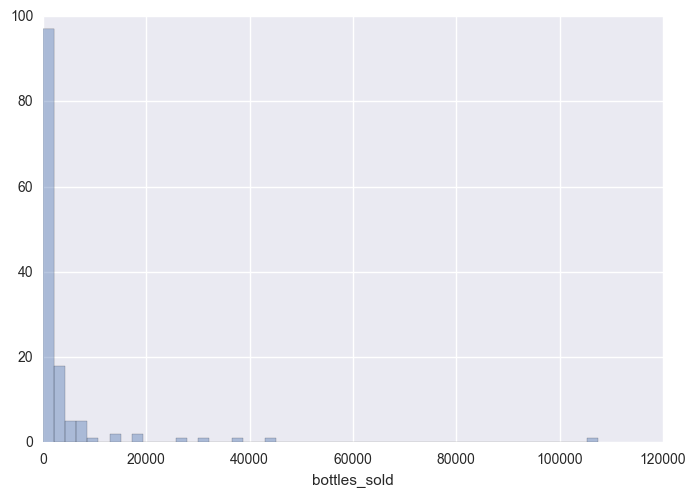

In [69]:
bottles_dist_2 = sns.distplot(y2_county_agg['bottles_sold'], kde=False)
plt.show()

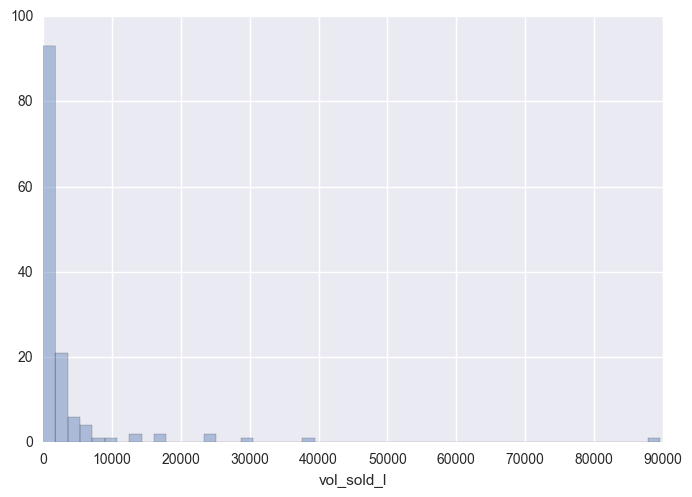

In [70]:
vol_dist_2 = sns.distplot(y2_county_agg['vol_sold_l'], kde=False)
plt.show() 

In [71]:
# I now have the total sales in each county for each year. 

In [72]:
iowadf.category_name.value_counts().head()

VODKA 80 PROOF               35373
CANADIAN WHISKIES            27087
STRAIGHT BOURBON WHISKIES    15342
SPICED RUM                   14631
VODKA FLAVORED               14001
Name: category_name, dtype: int64

In [73]:
y1_iowadf.county.value_counts().head()

Polk          39548
Linn          19178
Scott         13406
Black Hawk    12118
Johnson       10704
Name: county, dtype: int64

In [74]:
y1_p1_iowadf.county.value_counts().head()

Polk          9003
Linn          4363
Scott         2940
Black Hawk    2677
Johnson       2381
Name: county, dtype: int64

In [75]:
y2_iowadf.county.value_counts().head()

Polk          9554
Linn          4333
Scott         3272
Black Hawk    2965
Johnson       2485
Name: county, dtype: int64

In [76]:
#Make a new df of liquor by sales. 

In [77]:
liquor_sales = iowadf[['category_name','sale_dollars', 'bottles_sold']]

In [78]:
liquor_sales.head()

,category_name,sale_dollars,bottles_sold
0,APRICOT BRANDIES,81.00,12
1,BLENDED WHISKIES,41.26,2
2,STRAIGHT BOURBON WHISKIES,453.36,24
3,AMERICAN COCKTAILS,85.50,6
4,VODKA 80 PROOF,129.60,12


In [79]:
liquor_summary = liquor_sales.groupby('category_name').sale_dollars.agg(['count', 'mean', 'min', 'max']).sort('mean')

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [80]:
liquor_summary

,count,mean,min,max
category_name,,,,
ANISETTE,35,28.130857,7.13,94.56
WHITE CREME DE MENTHE,61,30.390164,7.13,85.56
WHITE CREME DE CACAO,201,35.474378,6.75,171.12
CREME DE ALMOND,52,35.825192,6.75,425.16
AMERICAN SLOE GINS,169,36.654734,7.13,215.76
DARK CREME DE CACAO,157,38.035605,6.75,342.24
ROCK & RYE,86,38.173256,7.40,189.00
GREEN CREME DE MENTHE,259,38.807336,6.75,256.68
LOW PROOF VODKA,15,39.874667,15.74,62.96


# Record your findings

Be sure to write out any observations from your exploratory analysis.

The counties with the most transactions in the first three months of 2015 include Polk (9003), Linn (4363), Scott (2940), Black Hawk (2677), Johnson (2381).

The counties with the most transactions in the first three months of 2016 include Polk (9554), Linn (4333), Scott (3272), Black Hawk (2965), Johnson (2485).

Most counties sold approximately 60,000 or less in total sale dollars, 6,000 bottles sold, and 4,000 liters and from January-March 2015. 

The total sale of alcohol for all counties in 2015 was approximately $28,527,245. 

Most counties sold roughly 6,000 or fewer liters of alcohol during 2015. 

The average number of bottles sold so far per county in 2016 is 4955 bottles.

Most counties have sold approximately 60,000 dollars worth, 30,000 liters or less of alcohol or less, and 6,000 bottles or less in the first three months of 2016, based on my plotted distributions above.

Important: Note that Iowa counties in total sold approximately 6,291,870.90 worth of alcohol Jan-March 2016, slightly more than the 6,153,795.89 in Jan-March 2015.

The most popular categories of liquor are Vodka 80 Proof (35373), Canadian Whiskies (27087), Straight Bourbon Whiskies (15342), Spiced Rum(14631), Vodka Flavored(14001), Tequila (12109),
Blended Whiskies (11547), Whiskey Liquer (10902), Imported Vodka (10688), and Puerto Rico & Virgin Islands Rum (10062)

The highest selling liquors overall across time, by average sales, include imported ameretto(747.20), Japanese whisky(382.74), 'decanters and specialy packages' (266), Irish Whiskies (227.23), Tennessee Whiskies (225.75), Straight Rye Whiskies (218.63), imported vodka (194.88), spiced rum (186.43), imported grape brandies (173.95), and single malt scotch (167.17).

The lowest selling liquors overall across time include anisette (28.13), white creme de menthe(30.39), white creme de cacao (35.47), creme de almond(35.82), American sloe gins (36.65), dark creme de cacao (38.03), rock & rye (38.17), green creme de menthe (38.80), low proof vodka (39.87), and tropical fruit schnapps (40.40). 


The counties with the most transactions include Polk (49012), Linn(23511), Scott(166678), Black Hawk (15083), Johnson(13189), Pottawattamie(9111), Story(8959), Woodbury(8562), 
Dubuqe (7757), Cerro Gerdo (6374), and Des Moines(4090). 

The highest selling counties overall across time, by mean sales, include Dallas  (231.18), Carroll (160.48), Polk (158.56), Johnson (158.55), Shelby (153.51), Howard (152.32),  Floyd (149.25), Scott (148.02), Sioux (147.84) and Woodbury (146.36).

The lowest selling counties overall across time, by mean sales, include Taylor (50.27), Mitchell (50.94), Adams (53.17), Keokuk (53.34), Monona (54), Harrison(56.30), Louisa (63.44), Jones (65.01), Davis (65.01), and Palo Alto (66.07). 

The counties with the most transactions AND highest average sales include Polk (48944, 158.28), Johnson (13163, 157.86), Scott (16630, 147.76), Woodbury (8541, 146.30), 

## Risks & assumptions of data

Iowa counties in total sold approximately 6,291,870.90 worth of alcohol Jan-March 2016, slightly more than the 6,153,795.89 in Jan-March 2015. This is approximately a 138,075 difference, which might be more significant for some counties that others (maybe one county accounts for most of this gained amount, or others have lost significant business to others). 

We had 1077 missing counties, which I filled with cities instead. I don't believe this would affect my data significantly. 

We have a few outlying counties with overall sales that are exceptionally higher than most other counties. As some of these counties account for a high portion of the state's sales, it wouldn't be prudent to drop them.

# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

I'm going to use the aggregates for each county to predict which quantifiable features, along with dummies for counties, will affect my target variable, sale dollars. 

In [81]:
y1_p1_county_agg = y1_p1_county_agg.drop(y1_p1_county_agg.columns[[1,2,3,4,8,9]], axis=1)

In [82]:
y2_county_agg = y2_county_agg.drop(y2_county_agg.columns[[1,2,3,4,8,9]], axis=1)

In [83]:
y1_p1_county_agg.head()

,county,bottles_sold,sale_dollars,vol_sold_l
0,Adair,1075,10222.00,814.54
1,Adams,174,2253.60,183.27
2,Allamakee,1135,14907.98,1244.68
3,Appanoose,1317,15228.09,1207.15
4,Audubon,435,5510.75,557.50


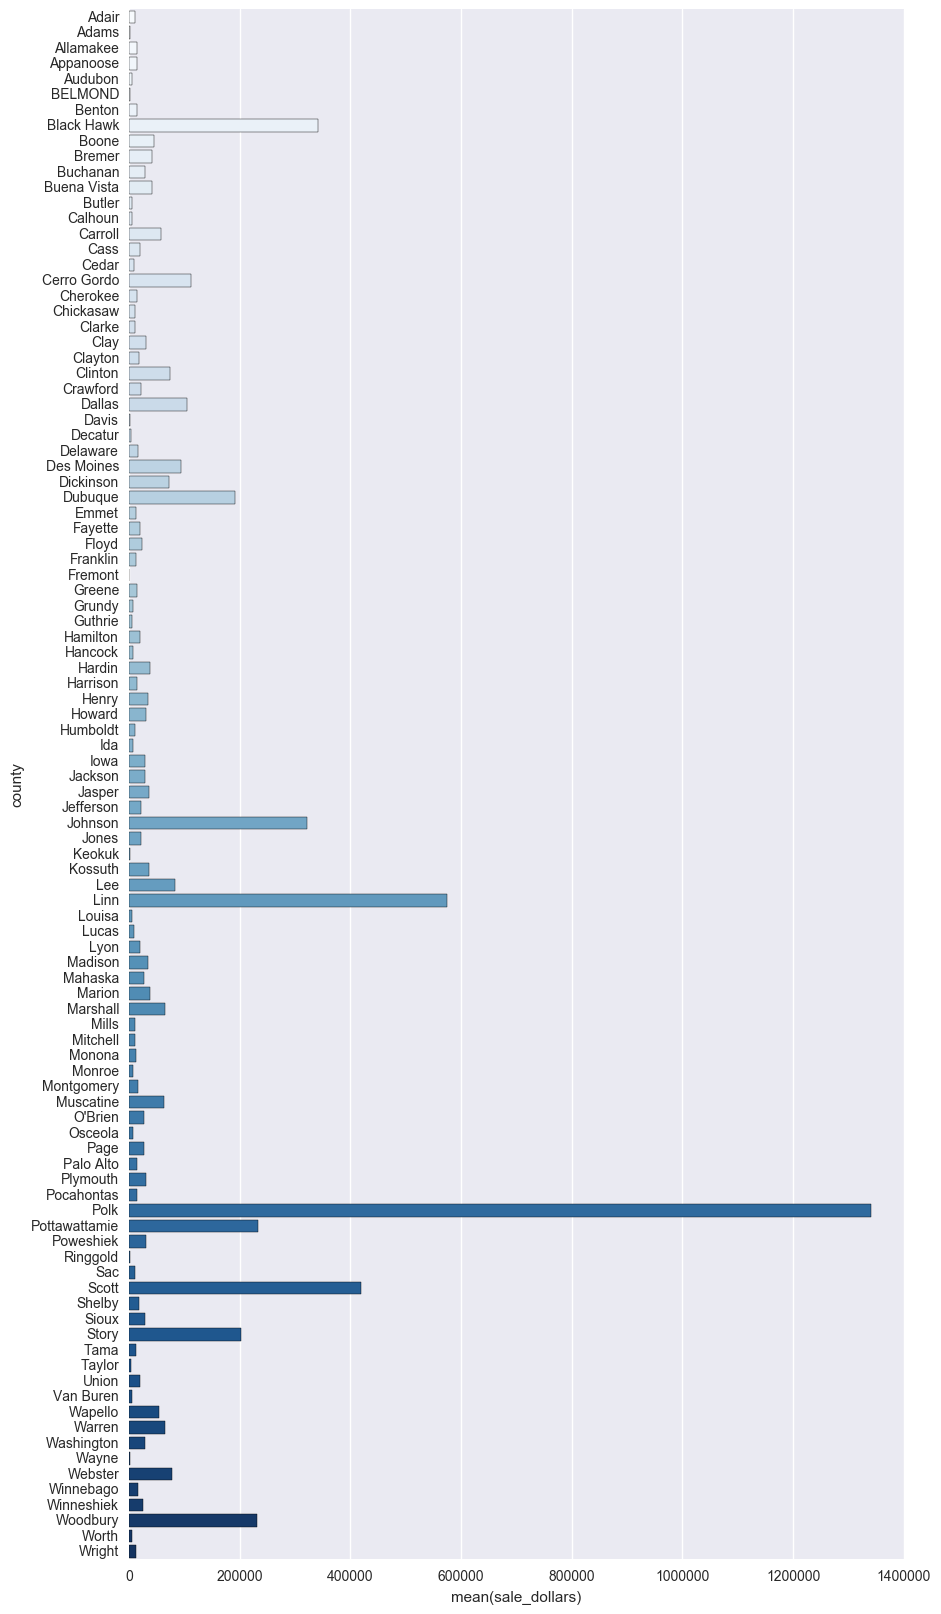

In [282]:
#Method shared with me by Phil Brad. 
plt.figure(figsize=(10,20))
sns.barplot(y='county', x="sale_dollars", data=y1_p1_county_agg, label='county', palette='Blues')
plt.yticks(size=10)
plt.show()

In [84]:
y2_county_agg.head()

,county,bottles_sold,sale_dollars,vol_sold_l
0,ACKLEY,93,1583.75,101.75
1,ALTOONA,207,3788.34,186.75
2,ANAMOSA,280,4257.62,311.13
3,ATLANTIC,36,385.62,21.75
4,AUDUBON,27,186.69,14.62


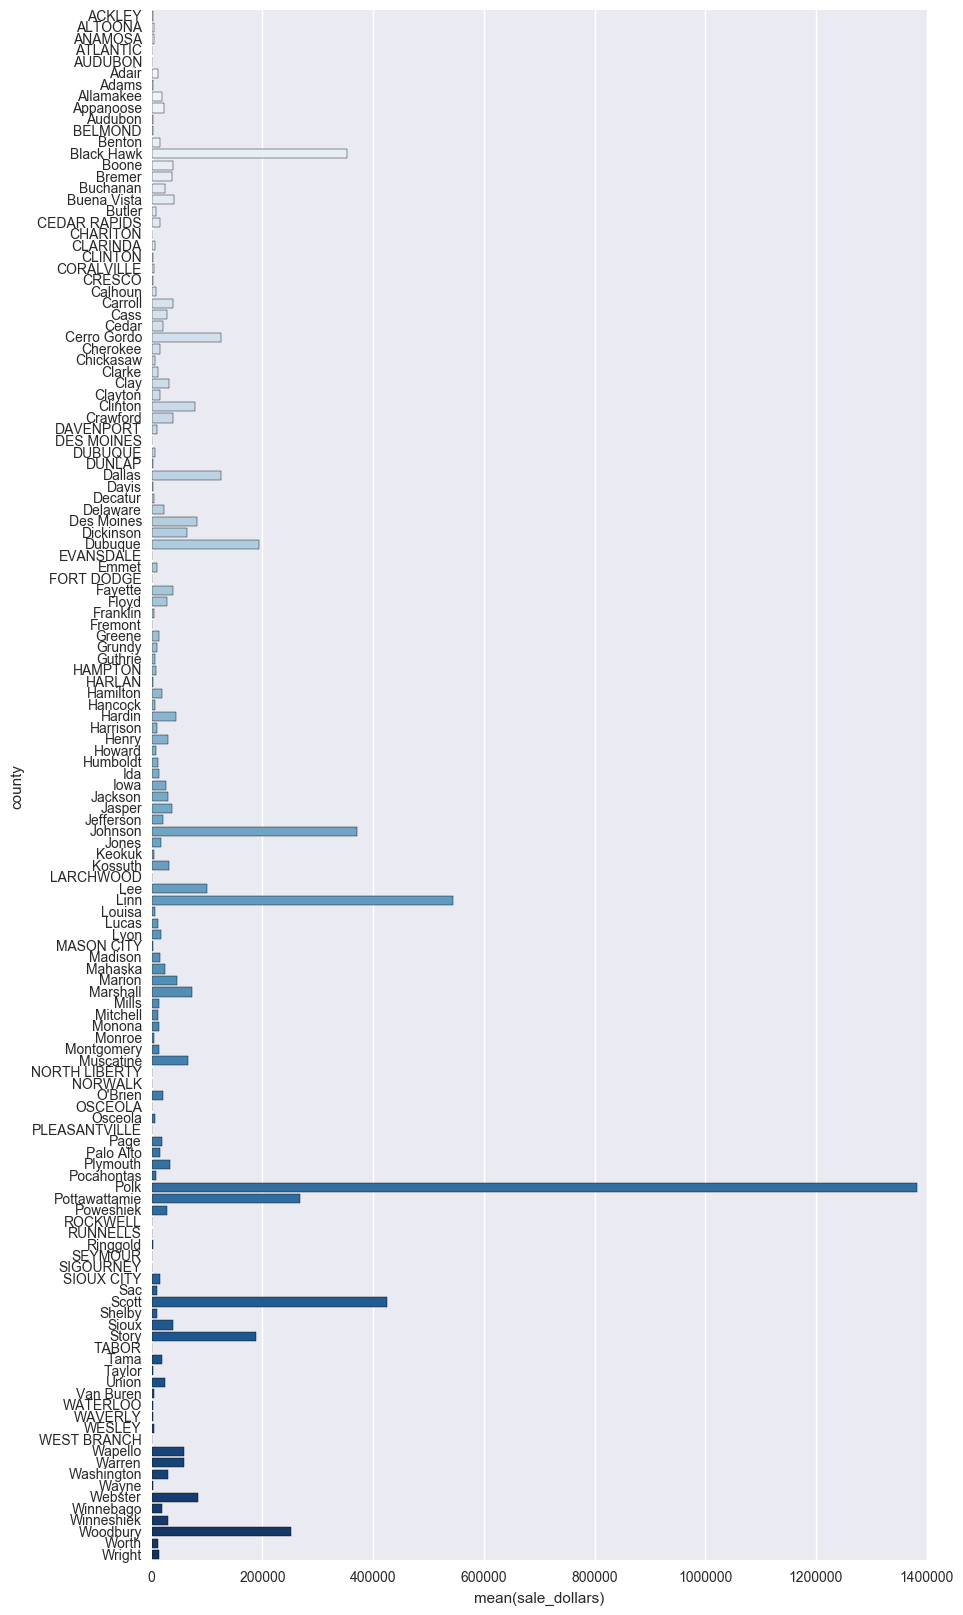

In [281]:
#Method shared with me by Phil Brad. 
plt.figure(figsize=(10,20))
sns.barplot(y='county', x="sale_dollars", data=y2_county_agg, label='county', palette='Blues')
plt.yticks(size=10)
plt.show()

In [85]:
#Get dummies for both to make counties a calculable variable.

In [86]:
y1_test_data = pd.get_dummies(y1_p1_county_agg).head()

In [87]:
y1_test_data.head()

,bottles_sold,sale_dollars,vol_sold_l,county_Adair,county_Adams,county_Allamakee,county_Appanoose,county_Audubon,county_BELMOND,county_Benton,...,county_Wapello,county_Warren,county_Washington,county_Wayne,county_Webster,county_Winnebago,county_Winneshiek,county_Woodbury,county_Worth,county_Wright
0,1075,10222.00,814.54,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,174,2253.60,183.27,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1135,14907.98,1244.68,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1317,15228.09,1207.15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,435,5510.75,557.50,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
y2_test_data = pd.get_dummies(y2_county_agg).head()

In [89]:
y2_test_data.head()

,bottles_sold,sale_dollars,vol_sold_l,county_ACKLEY,county_ALTOONA,county_ANAMOSA,county_ATLANTIC,county_AUDUBON,county_Adair,county_Adams,...,county_Wapello,county_Warren,county_Washington,county_Wayne,county_Webster,county_Winnebago,county_Winneshiek,county_Woodbury,county_Worth,county_Wright
0,93,1583.75,101.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,207,3788.34,186.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,280,4257.62,311.13,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,385.62,21.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27,186.69,14.62,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
lr = LinearRegression()

In [198]:
X = y1_test_data.drop(['sale_dollars'], axis=1) 
y = y1_test_data['sale_dollars']

In [199]:
reg.fit(X,y)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [200]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.5, random_state = 99 )

In [201]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [204]:
lr.score(X_test, y_test)

0.94947527794093256

In [213]:
#Testing for counties on their own. 
X_c = y1_test_data.drop(['sale_dollars', 'vol_sold_l', 'bottles_sold'], axis=1) 
y_c = y1_test_data['sale_dollars']

In [214]:
reg.fit(X_c,y_c)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X_c,y_c, train_size = 0.5, random_state = 99 )

In [216]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [217]:
lr.score(X_test, y_test)

-0.14736615112003704

In [95]:
#Found that counties on their own are not predictive of sale dollars.

In [252]:
#Check for volume liters sold. 
X_v = y1_test_data.drop(['sale_dollars','bottles_sold'], axis=1)
y_v = y1_test_data['sale_dollars']

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X_v,y_v, train_size = 0.5, random_state = 99 )

In [259]:
reg.fit(X_v,y_v)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [260]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [261]:
lr.score(X_test, y_test)

0.93569252520437118

In [262]:
#Volume liters sold is HIGHLY predictive. 

In [263]:
#Check for bottles sold. 
X_b = y1_test_data.drop(['vol_sold_l','sale_dollars'], axis=1)
y_b = y1_test_data['sale_dollars']

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X_b,y_b, train_size = 0.5, random_state = 99 )

In [265]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [266]:
reg.fit(X_b,y_b)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [267]:
lr.score(X_test, y_test)

0.81342471921817738

In [105]:
# Bottles sold is significantly less predictive than volume liters sold in determining sale numbers
# However, this may be simply due to the different measurements and aggregates of these variables. 

In [ ]:
#Testing for 2016. 

In [130]:
y2_test_data.head()

,bottles_sold,sale_dollars,vol_sold_l,county_ACKLEY,county_ALTOONA,county_ANAMOSA,county_ATLANTIC,county_AUDUBON,county_Adair,county_Adams,...,county_Wapello,county_Warren,county_Washington,county_Wayne,county_Webster,county_Winnebago,county_Winneshiek,county_Woodbury,county_Worth,county_Wright
0,93,1583.75,101.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,207,3788.34,186.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,280,4257.62,311.13,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,385.62,21.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27,186.69,14.62,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
#Testing for all variables.
X = y2_test_data.drop(['sale_dollars'], axis=1) 
y = y2_test_data['sale_dollars']

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.5, random_state = 99 )

In [232]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [233]:
reg.fit(X,y)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [234]:
lr.score(X_test, y_test)
#All variables are less predictive for sales in 2016 than in 2015, at 94 in 2015 to 72 in 2016.

0.72605293409488048

In [270]:
#Test for bottles_sold in year 2.
X_b2 = y2_test_data.drop(['sale_dollars','vol_sold_l'], axis=1) 
y_b2 = y2_test_data['sale_dollars']

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X_b2,y_b2, train_size = 0.5, random_state = 99 )

In [273]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [274]:
reg.fit(X_b2,y_b2)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [275]:
lr.score(X_test, y_test)
#Unlike in 2015, bottles sold is much more highly predictive. 

0.88653636711703476

In [241]:
#Test for volume liters sold.
X_v2 = y2_test_data.drop(['sale_dollars','bottles_sold'], axis=1) 
y_v2 = y2_test_data['sale_dollars']

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X_v2,y_v2, train_size = 0.5, random_state = 99 )

In [243]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [244]:
reg.fit(X_v2,y_v2)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [245]:
lr.score(X_test, y_test)
#Interestingly, volumes sold appeares to be far less predictive of sales than for 2015. 

0.46277006020044043

In [246]:
#Testing just for counties. 
X = y2_test_data.drop(['sale_dollars','bottles_sold', 'vol_sold_l'], axis=1) 
y = y2_test_data['sale_dollars']

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.5, random_state = 99 )

In [248]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [249]:
reg.fit(X,y)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [250]:
lr.score(X_test, y_test)
#As expected, counties are not correlated with sales. 

-0.0021123882801834526

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

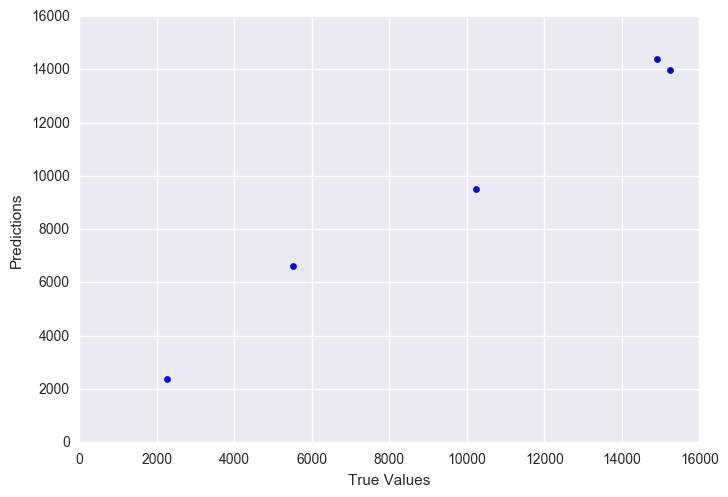

In [268]:
#Plotting predictions vs. true values based on volumes sold for 2015. 
predictions = lr.predict(X_v)
plt.scatter(y_v, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

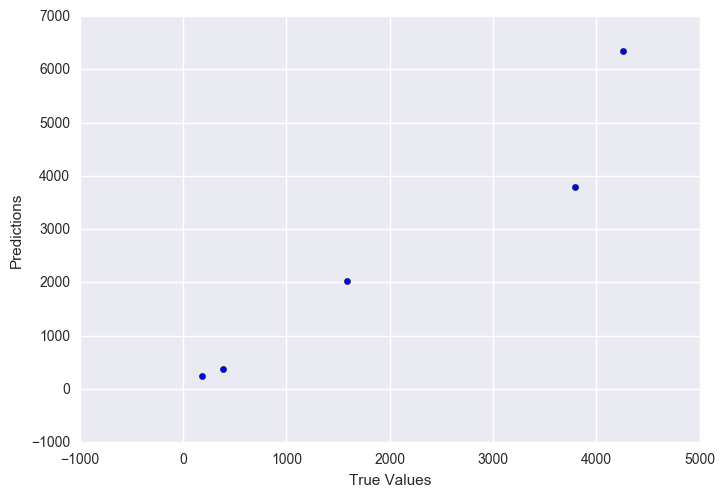

In [193]:
#Plotting for volumes sold in 2016. 
predictions = lr.predict(X_v2)
plt.scatter(y_v2, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

In [277]:
#Plotting for bottles sold in 2015. 

In [ ]:
predictions = lr.predict(X_b2)
plt.scatter(y_b2, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

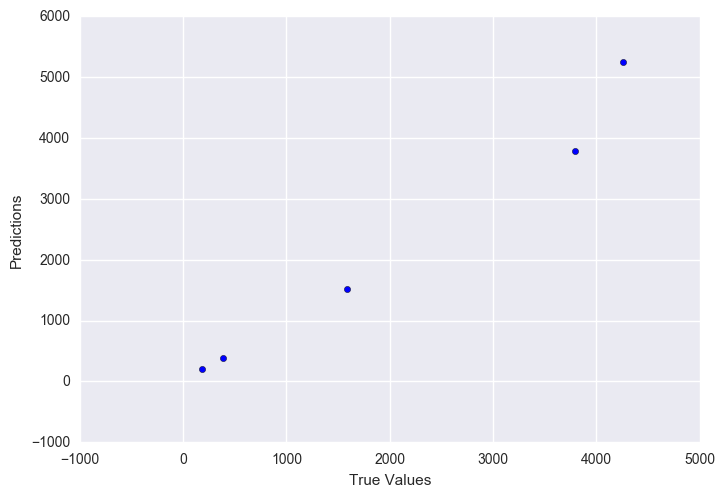

In [276]:
#Plotting for bottles sold in 2016. 
predictions = lr.predict(X_b2)
plt.scatter(y_b2, predictions)
plt.ylabel("Predictions")
plt.xlabel("True Values")
plt.show()

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.